# 002 Linear Regression with Gradient Descent

Let's try to do linear regression in yet another way.

## Predicting Student's grades from Study Hours

Let's predict how well students do based on how much they study. Hey, there should be something there, right??

We take data from an online source, which will give us 100 data points, which we then split into X and Y data.

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
from IPython import display

In [11]:
data = np.genfromtxt('https://raw.githubusercontent.com/kaustubholpadkar/Linear_Regression-Gradient_Descent-Octave/master/data.csv', delimiter=',')
print(data.shape)
X = data[:, 0]
Y = data[:, 1]

(100, 2)


What does the data look like?

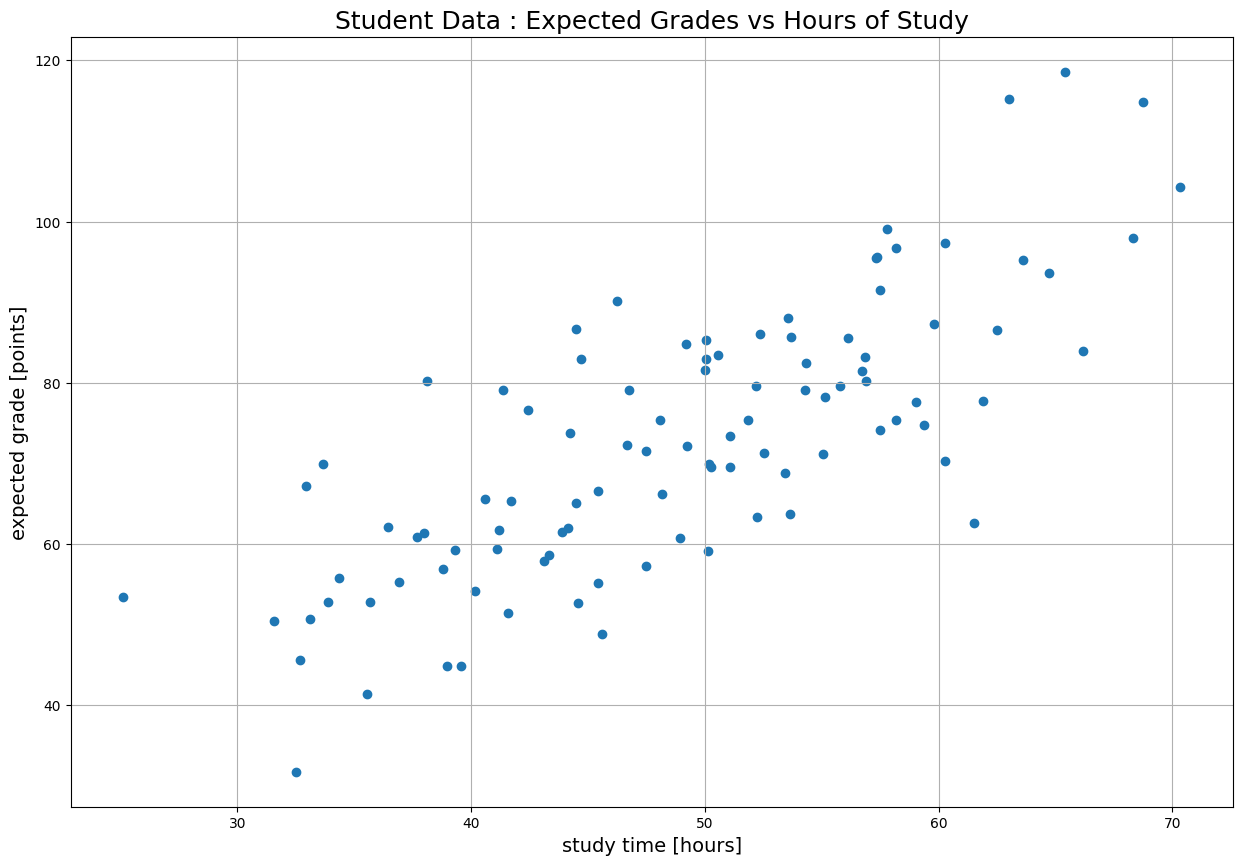

In [12]:
fig = plt.figure(figsize=(15,10))
plt.scatter(X,Y)
plt.title('Student Data : Expected Grades vs Hours of Study', fontsize=18)
plt.xlabel('study time [hours]', fontsize=14)
plt.ylabel('expected grade [points]', fontsize=14)
plt.grid()
plt.show()

So, there seems to be some sort of trend here ^^

### Model function

We would like to fit a line to our data, so let's first define the model of a line, given its two parameters (slope $m$ and intercept $b$):

$y = mX+b$

In [13]:
def line(m, b, X):
    return m * X + b

### Loss function

Next, we need to define our loss function that we want to optimize. As usual, we take the L2, Least-Squares-Loss:

$E(m,b) = \sum_i\left ( Y_i-\text{line}(m,b,X_i) \right )^2$

In [14]:
def loss(m, b, X, Y) :
    return np.sum(np.square(Y - line(m, b, X)))

The loss function is a function of two parameters and describes a surface: $E(m,b): \mathrm{R}^2\rightarrow\mathrm{R}$

Let's plot this for a range of parameters:

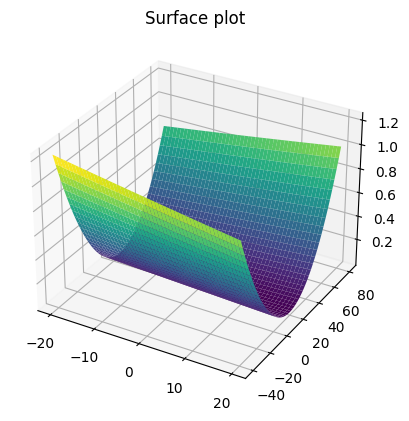

In [15]:
ms = np.linspace(-20,20,50)
bs = np.linspace(-40,80,50)

[msm,bsm] = np.meshgrid(ms,bs)

lossSurface = np.zeros((50,50))

for i,m in enumerate(ms):
    for j,b in enumerate(bs):
        lossSurface[i,j] = loss(m, b, X, Y)

from mpl_toolkits import mplot3d
%matplotlib inline
# notebook for interactive plotting outside of Colab.

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(msm, bsm, lossSurface,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
plt.show()

As we can see there seems to be a valley - and hopefully in this valley, we can find a minimum point, which is the lowest point of the loss function and our global optimum!!

<div class="alert alert-warning">
<p>
Q: How do we find this??

A: We start at a point and walk down

Q: In which direction do we walk??

A: In the direction that has the steepest slope downwards!

Q: How do we find this direction??

A: It's the negative gradient (two-dimensional)

Q: How far do we walk down in this direction

A: Not too far, otherwise we will "overshoot" and may miss our optimum!
</div>

### Calculate Gradients

Now, we have to do gradient descent. We will walk in the direction of the negative gradient of the loss function $E$.

The loss function has two parameters $E(m,b)$:

$\frac{\partial E}{\partial m}=-2*\sum (Y-\text{line})*X$

and

$\frac{\partial E}{\partial b}=-2*\sum (Y-\text{line})*(1)$


In [16]:
# this is the total gradient
def gradient (m, b, X, Y) :
    dm = - 2*np.sum((Y - line(m, b, X)) * X)
    db = - 2*np.sum(Y - line(m, b, X))
    return (dm, db)

### Gradient Descent

Now, the very simple gradient descent. In each step, we simply go a little bit in the direction of the negative gradient:

$m_{t+1}=m_t-\text{lr}\frac{\partial E}{\partial m}$

$b_{t+1}=b_t-\text{lr}\frac{\partial E}{\partial b}$

In [17]:
def gradient_descent (m, b, X, Y, learning_rate, max_iteration,waittime=0.02,onlineplot=True,lossplot=True) :
    errors = np.zeros(max_iteration)
    x = np.arange(25, 75)
    for i in range(max_iteration):
        # calculate the gradients
        dm, db = gradient (m, b, X, Y)
        # update the parameters with a little gradient @@
        m -= learning_rate * dm
        b -= learning_rate * db
        # evaluate the current line prediction
        y = [m * x_i + b for x_i in x]
        errors[i]=loss(m, b, X, Y)
        #print(errors[i])
        # plot it into plot
        if onlineplot:
            plt.figure(figsize=(10,6))
            display.clear_output(wait=True)
            plt.xlim(20, 80)
            plt.ylim(0, 140)
            plt.scatter(X,Y,c='b')
            plt.plot(x,y,c='k')
            plt.grid()
            plt.title('current iteration {}, total loss = {:.2f}'.format(i+1,loss(m,b,X,Y)))
            time.sleep(waittime)
            plt.show()
    # plot the total loss over iterations
    if lossplot:
        fig,ax = plt.subplots(figsize=(8,6))
        plt.plot(errors,'b.-')
        plt.xlabel('Iteration')
        plt.ylabel('Summed Squared Error')
        plt.grid()
    return (m, b)

### Train Model

We have to initialize gradient descent in order to start. Let's start at $m=b=0$, which is a flat line. This is obviously going to be a bad model with a high loss:

In [18]:
%matplotlib inline
m = 0
b = 0

# print out current total loss and loss per point
print(loss(m,b,X,Y),loss(m,b,X,Y)/len(Y))

556510.7834483214 5565.107834483214


Let's first look at the evolution of the optimization slowly.

In [1]:
learning_rate = 1e-7
max_iteration = 20
waittime = 1

m = 0
b = 0
m, b = gradient_descent (m, b, X, Y, learning_rate, max_iteration, waittime=waittime)

NameError: ignored

We can see that the total error goes down nicely across iterations.

Just to see the effect of the learning rate, let's try to learn "faster", by making bigger steps:

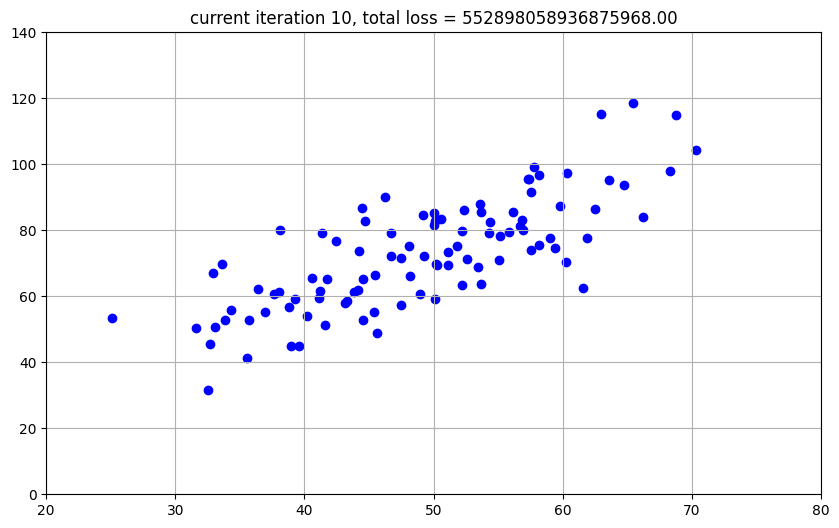

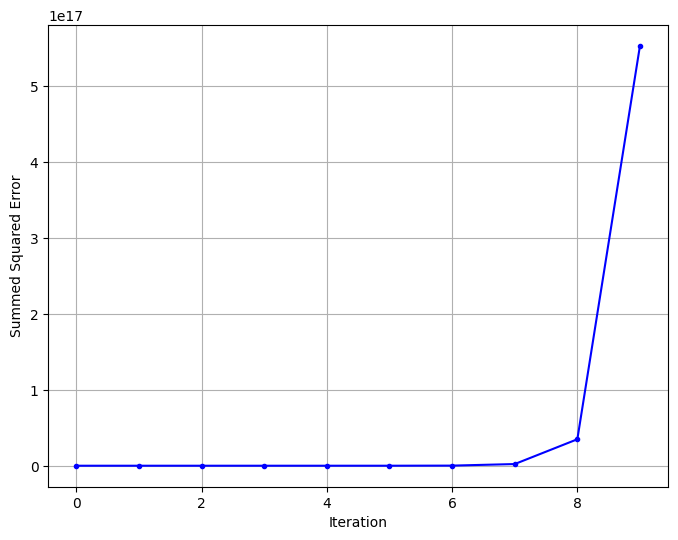

In [20]:
learning_rate = 1e-5  # only change -> step bigger ->
max_iteration = 10

m = 0
b = 0
m, b = gradient_descent (m, b, X, Y, learning_rate, max_iteration, waittime=waittime)

And, that led the optimization to go crazy.
<div class="alert alert-warning">
<p>
Remember: ...
</div>

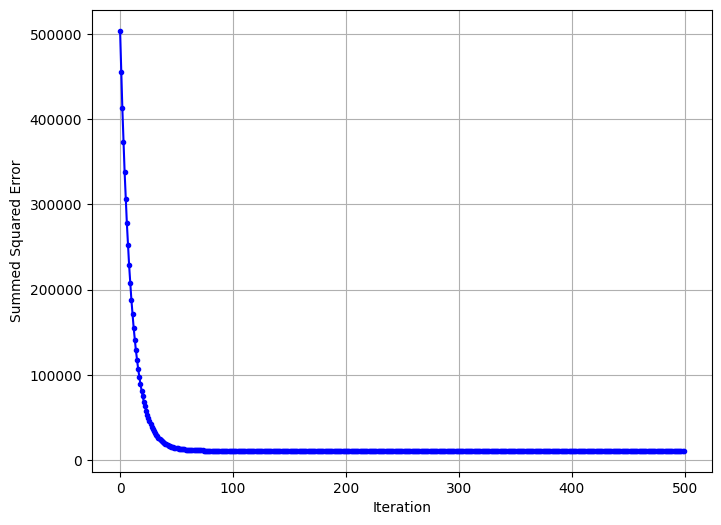

In [21]:
learning_rate = 1e-7
max_iteration = 500

m = 0
b = 0
m, b = gradient_descent (m, b, X, Y, learning_rate, max_iteration, onlineplot=False)

Let's plot the resulting fit together with numpy's ```polyfit``` function result:

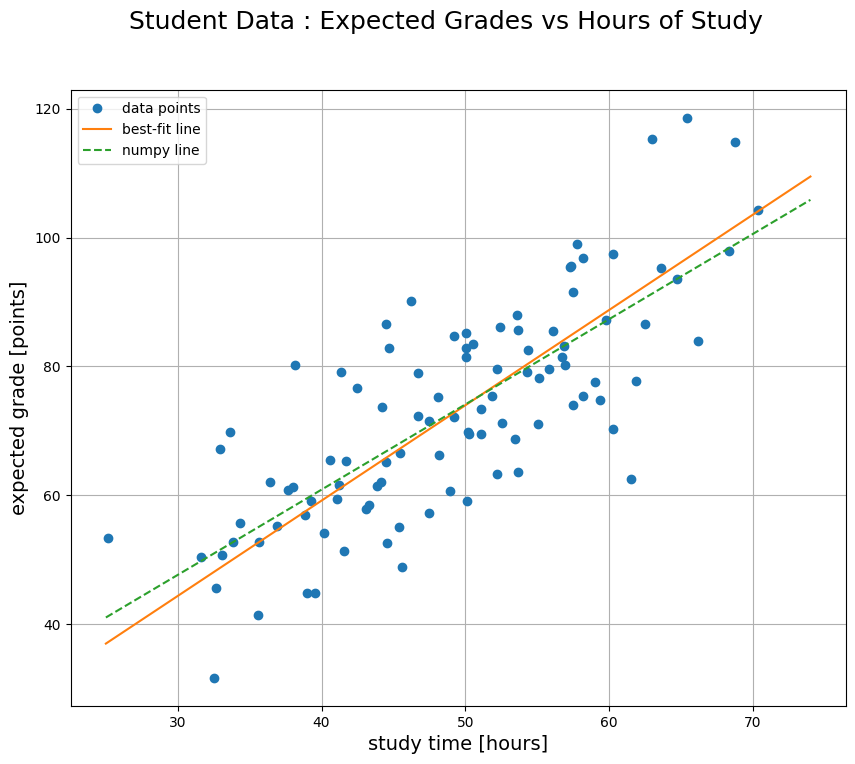

In [ ]:
fig = plt.figure(figsize=(10,8))

# Generate data for plotting line after gradient descent
x = np.arange(25, 75)
y = [m * x_i + b for x_i in x]

# numpy linear regression
np_m, np_b = np.polyfit(X, Y, 1)
# Generate data for plotting line from numpy linear regression
np_x = np.arange(25, 75)
np_y = [np_m * x_i + np_b for x_i in np_x]

# plot data and best-fit lines
plt.plot(X, Y, 'o', x, y, '-', np_x, np_y, '--')
plt.legend(loc='upper left', labels=['data points', 'best-fit line', 'numpy line'])

fig.suptitle('Student Data : Expected Grades vs Hours of Study', fontsize=18)
plt.xlabel('study time [hours]', fontsize=14)
plt.ylabel('expected grade [points]', fontsize=14)
plt.grid()
plt.show()

And that's nice!

## Stochastic optimization and batching

What we did up there was to fit the line over several iterations, and calculating the gradient necessary for updating the weights in each iteration using **all** datapoints.

<div class="alert alert-warning">
<p>
When you have presented all of your datapoints once to a learning algorithm, we also often call this epoch.
</div>

There are, however, other ways to update the weights.

We can, for example, not put all of our datapoints into the gradient calculation at once.

<div class="alert alert-warning">
<p>
The set of datapoints that we use for updating the weights in this case is called a batch.
</div>

### Stochastic gradient descent

If we use **stochastic gradient descent**, for example, we will select a random subsample of all datapoints in each iteration, and then use this to drive the overall procedure. We will therefore **not** finish an epoch within each iteration, but rather are satisfied with taking a smaller set of points for gradient calculation.

Why would one want to do this?

If we have lots of noisy points in our optimization, this may actually lead to instabilities during the optimization, such that the gradient descent will eventually diverge.

Hence, selecting a random subsample in each iteration may actually lead to more robust optimization overall.

You will, however, have to probably do more iterations to arrive at a "good" end result, and possibly also adjust the step size in order to cope with the more fluctuating gradient values.

Let's try this:

In [ ]:
# this is stochastic gradient descent
def gradient_stochastic (m, b, X, Y,size=10) :
    # get random indices
    # this does not check whether size is "correct"
    ind = np.random.choice(np.arange(len(Y)),size=size)
    print(ind)
    dm = - 2*np.sum((Y[ind] - line(m, b, X[ind])) * X[ind])
    db = - 2*np.sum(Y[ind] - line(m, b, X[ind]))
    return (dm, db)

In [ ]:
def gradient_descent_stochastic (m, b, X, Y, learning_rate, max_iteration, size=10, waittime=0.02,onlineplot=True,lossplot=True) :
    errors = np.zeros(max_iteration)
    x = np.arange(25, 75)
    for i in range(max_iteration):
        # calculate the gradients in a stochastic way
        dm, db = gradient_stochastic (m, b, X, Y, size=size)
        # update the parameters with a little gradient
        m -= learning_rate * dm
        b -= learning_rate * db
        # evaluate the current line prediction
        y = [m * x_i + b for x_i in x]
        errors[i]=loss(m, b, X, Y)
        print(errors[i])
        # plot it into plot
        if onlineplot:
            plt.figure(figsize=(10,6))
            display.clear_output(wait=True)
            plt.xlim(20, 80)
            plt.ylim(0, 140)
            plt.scatter(X,Y,c='b')
            plt.plot(x,y,c='k')
            plt.grid()
            plt.title('current iteration {}, total loss = {:.2f}'.format(i+1,loss(m,b,X,Y)))
            time.sleep(waittime)
            plt.show()
    # plot the total loss over iterations
    if lossplot:
        fig,ax = plt.subplots(figsize=(8,6))
        plt.plot(errors,'b.-')
        plt.xlabel('Iteration')
        plt.ylabel('Summed Squared Error')
        plt.grid()
    return (m, b)

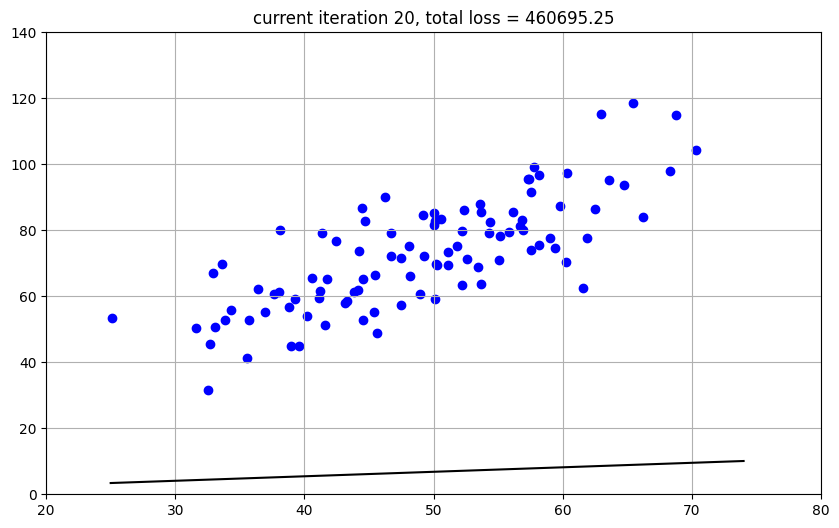

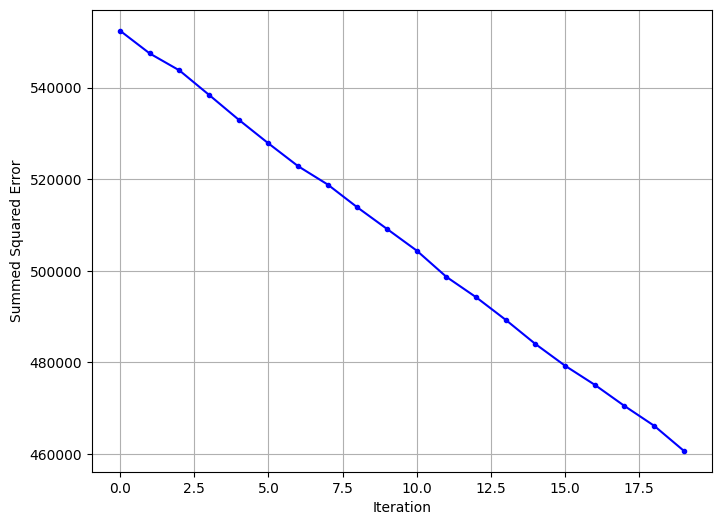

In [ ]:
learning_rate = 1e-7
max_iteration = 20
waittime = 1

m = 0
b = 0
m, b = gradient_descent_stochastic (m, b, X, Y, learning_rate, max_iteration, waittime=waittime)

As you can see, with the exact same starting points, just taking 10 points of the line in each step leads to much slower, and a bit noisier convergence.

Let's experiment with an even smaller batch

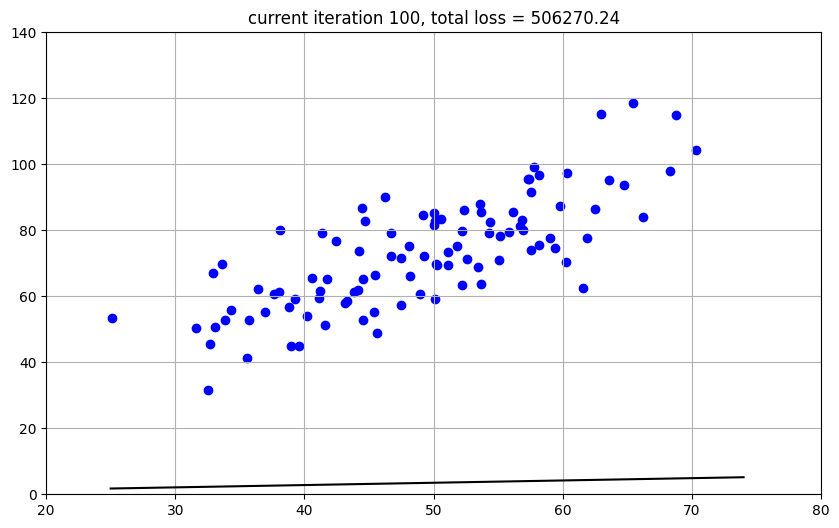

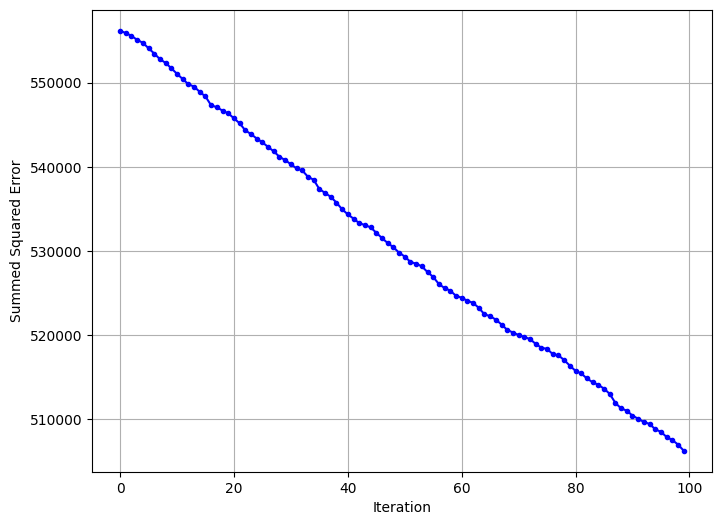

In [ ]:
learning_rate = 1e-7
max_iteration = 100
waittime = 0.01

m = 0
b = 0
m, b = gradient_descent_stochastic (m, b, X, Y, learning_rate, max_iteration, size=1, waittime=waittime)

And now you can think a little bit about why it is possible to fit a line with one point???

Note, that for fitting a line like this, the gradient is very robust, and in fact as we know this is a problem with a closed-form, analytic solution, so the optimization is stable. In general, however, stochastic gradient descent will not lead to a loss curve that is monotonically decreasing, and the loss may fluctuate quite a bit!

### Batching

In many cases, it is not possible to submit all datapoints in your optimization for calculating the gradient. Here, we are optimizing a 2D-problem - think about calculating gradients for large amounts of neurons in a neural network, which, for example, are trying to find structure in 3D brain scan volumes!!.

In this case, you have to resort to batching, which means that in order to finish an epoch, you will present the data in batches. Let's say the first 10 datapoints, then the second, etc.

The gradient gets updated after each batch, until the epoch is done.

You can select these batches at random from all your datapoints, or always the same, or shuffle the order of the batches, etc. These all lead to slightly different updates for your gradient and hence introduce more or less variability in your optimization.

We will get back to this point, when we talk about optimization for neural networks in more detail.

# Non-linear optimization with Gradient Descent
Obviously, fitting a line is not really the fanciest of applications, since it is well-known that this problem has an analytic solution.

What about non-linear data? Let's first turn to the simple problem of one-dimensional optimization.

We have a function $f(x)$, for which we are trying to find an optimal point, i.e., a point $x_{opt}$, at which $f(x_{opt})=f_{opt}$ is either a minimum or a maximum.

If we know the gradient then this of course means that $\frac{d}{dx}f(x) = g(x)$ at this point needs to be 0: $g(x_{opt})=0$.

So, we simply choose a starting point and walk along the function in the direction of the gradient.

In [ ]:
# define the total "loss" function to optimize
def loss_nl(x):
    return(np.cos(x+0.5)*np.exp(0.5*x))

In [ ]:
# gradient of the function
def gradient_nl(x):
    return(-np.sin(x+0.5)*np.exp(0.5*x)+0.5*np.cos(x+0.5)*np.exp(0.5*x))

In [ ]:
# our usual gradient descent algorithm
def gradient_descent_nl(xmax, learning_rate, max_iteration,waittime=0.02,onlineplot=True,lossplot=True) :
    errors = np.zeros(max_iteration)
    x = np.arange(-5,10,0.1)
    for i in range(max_iteration):
        dxmax = gradient_nl(xmax)
        xmax -= learning_rate * dxmax
        y = loss_nl(x)
        errors[i]=dxmax
        if onlineplot:
            plt.figure(figsize=(10,6))
            display.clear_output(wait=True)
            plt.xlim(-5, 10)
            plt.ylim(-200, 200)
            plt.plot(x,y,c='k')
            plt.plot([xmax,xmax],[-200,200],c='r')
            plt.grid()
            plt.title('current iteration {}, optimal point at = {:.2f}'.format(i+1,xmax))
            time.sleep(waittime)
            plt.show()
    if lossplot:
        fig,ax = plt.subplots(figsize=(8,6))
        plt.plot(errors,'b.-')
        plt.xlabel('Iteration')
        plt.ylabel('Summed Squared Error')
        plt.grid()
    return (xmax)

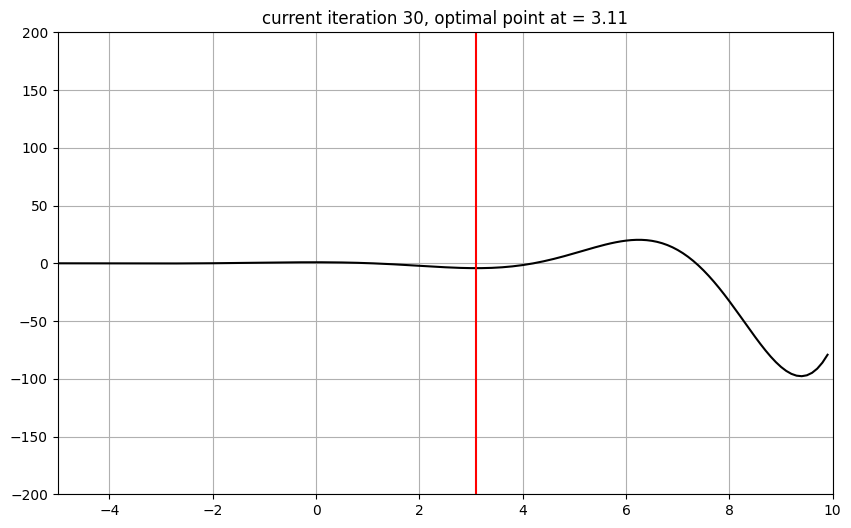

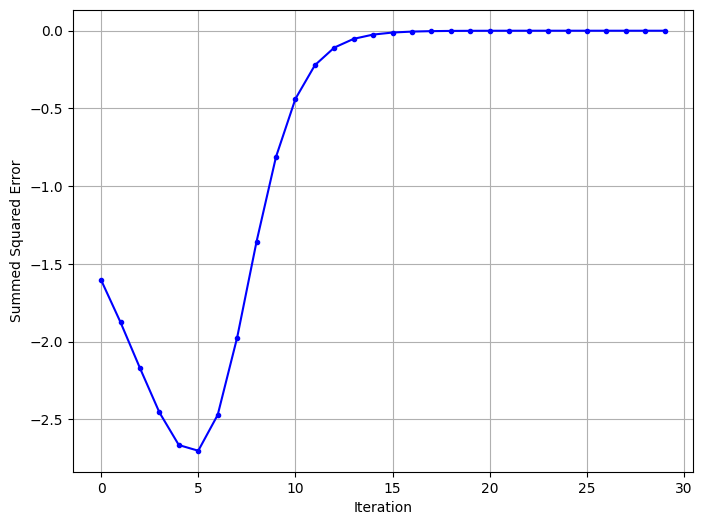

In [ ]:
learning_rate = 1e-1
max_iteration = 30
waittime = 0.1
xstart = 1.01
xmax = gradient_descent_nl (xstart, learning_rate, max_iteration, waittime)

In [ ]:
# more complex function
def loss_nl(x):
    return(np.cos(x+0.5)*np.exp(0.5*np.sin(x)+np.log(x**2)))

# fun derivative
def gradient_nl(x):
    return(np.cos(x + 1/2)*np.exp(np.log(x**2) + np.sin(x)/2)*(np.cos(x)/2 + 2/x) - np.sin(x + 1/2)*np.exp(np.log(x**2) + np.sin(x)/2))

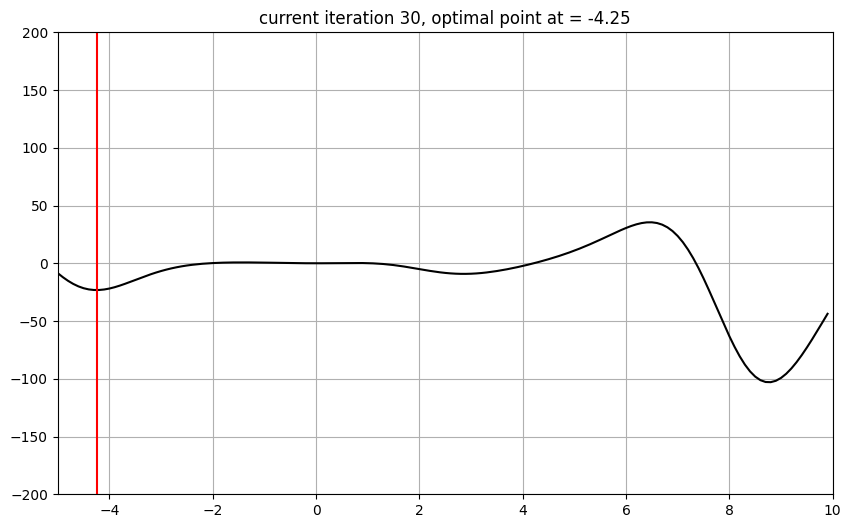

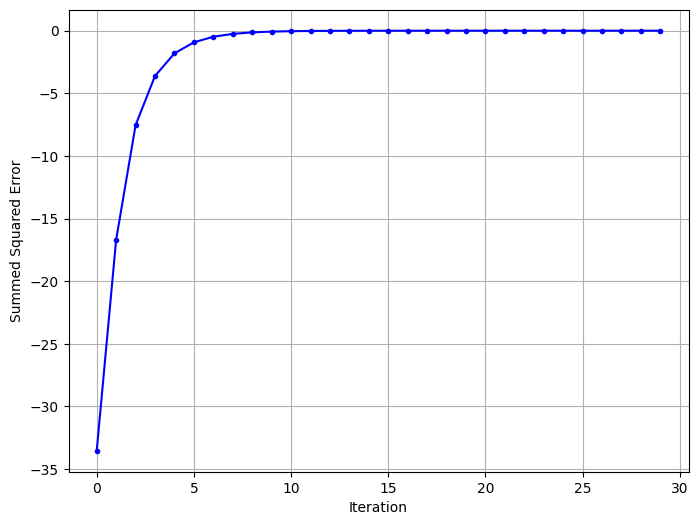

In [ ]:
learning_rate = 1e-2
max_iteration = 30
waittime = 0.1
xstart = -4.9
xmax = gradient_descent_nl (xstart, learning_rate, max_iteration, waittime)

## Fitting to an exponential function with least squares and gradient descent

So, let's apply this idea to another dataset. Here, we take data from the COVID outbreak in the US, available at https://covidtracking.com/data/download/national-history.csv

I cut out the 20 days of the initial data, when the death toll due to COVID started to rise.

In [ ]:
# for some reason, in colab the simple code
# data = np.genfromtxt('https://covidtracking.com/data/download/national-history.csv', delimiter=',')
# does not work, so I've made a workaround with the requests package!

import requests
import io

# load the data
response = requests.get('https://covidtracking.com/data/download/national-history.csv')
# not strictly necessary but good practice
response.raise_for_status()
# interpret results as BYTES, so that numpy can read from it!
data = np.genfromtxt(io.BytesIO(response.content),delimiter=',')
print(data.shape)

(421, 17)


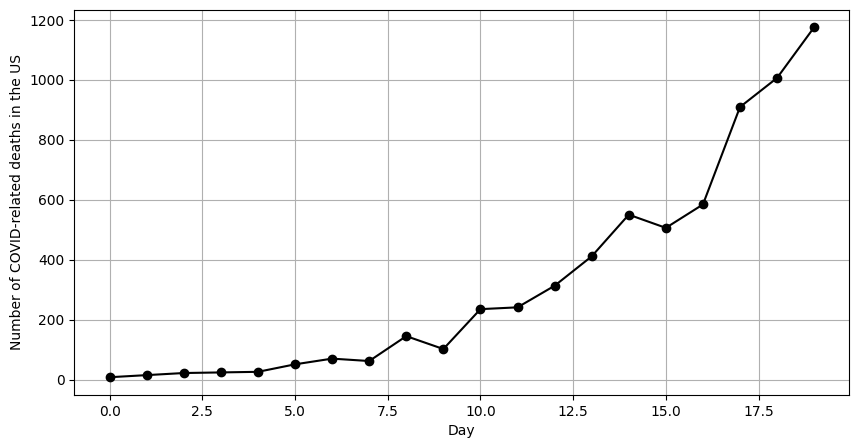

In [ ]:
X = np.arange(20)
Y = data[340:360, 2]
Y = np.flip(Y)
fig = plt.figure(figsize=(10,5))
plt.plot(X,Y,'ko-')
plt.grid()
plt.xlabel('Day')
plt.ylabel('Number of COVID-related deaths in the US')
plt.show()


In [ ]:
# define the exponential model
def nl_exp(l, b, X):
    return(np.exp(l*X+b))

# define the least squares loss
def loss_nl (l, b, X, Y) :
    return np.sum(np.square(Y - nl_exp(l, b, X)))

# derivatives of the loss function with regard to the two parameters
def gradient_nl (l, b, X, Y) :
    dl = - 2*np.sum((Y - nl_exp(l, b, X)) * X * np.exp(l*X+b))
    db = - 2*np.sum((Y - nl_exp(l, b, X)) * np.exp(l*X+b))
    return (dl, db)

# actual gradient descent [identical in its logic to the function above]
def gradient_descent_nl (l, b, X, Y, learning_rate, max_iteration,waittime=0.02,onlineplot=True,lossplot=True) :
    errors = np.zeros(max_iteration)
    x = np.arange(0, 20)
    for i in range(max_iteration):

        dl, db = gradient_nl (l, b, X, Y)
        l -= learning_rate * dl
        b -= learning_rate * db
        y = [np.exp(l* x_i + b) for x_i in x]
        errors[i]=loss(l, b, X, Y)
        if onlineplot:
            plt.figure(figsize=(10,6))
            display.clear_output(wait=True)
            plt.xlim(0, 20)
            plt.ylim(0, 1200)
            plt.scatter(X,Y,c='b')
            plt.plot(x,y,c='k')
            plt.grid()
            plt.title('current iteration {}, total loss = {:.2f}, l={}, b={}'.format(i+1,loss(m,b,X,Y),l,b))
            time.sleep(waittime)
            plt.show()
    if lossplot:
        fig,ax = plt.subplots(figsize=(8,6))
        plt.plot(errors,'b.-')
        plt.xlabel('Iteration')
        plt.ylabel('Summed Squared Error')
        plt.grid()
    return (m, b)

In [ ]:
print(loss_nl(0.1,1,X,Y))

4375418.995457208


This is an **extremely** fiddly optimization, as the learning rate can easily overshoot in the later stages. You are welcome to try different starting points and learning rates for this.

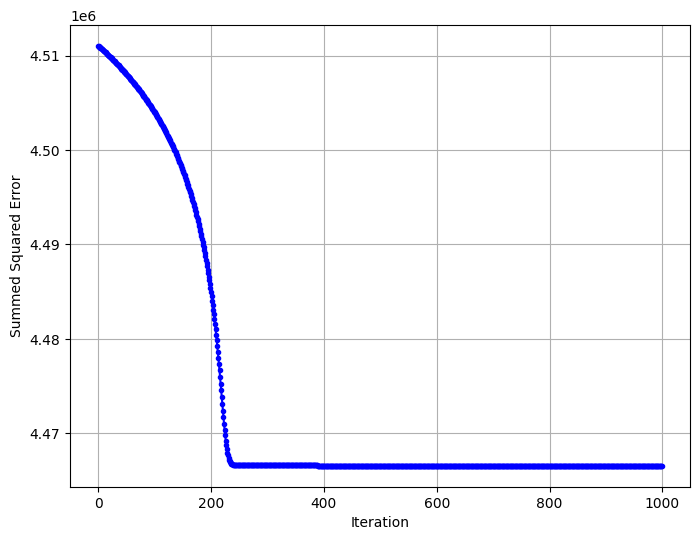

In [ ]:
learning_rate = 1e-10
max_iteration = 1000
waittime = 0.01
l = 0.1
b = 1
l, b = gradient_descent_nl (l, b, X, Y, learning_rate, max_iteration, onlineplot=False)

So, the question now of course is: is this really an exponential growth? Given the processes of virus transmission, we may have reason to believe so, but as you can see, the overall growth seems sub-exponential.

In addition, we have tried to optimize this with the "raw" exponential function, which - as you can see from the fiddling with learning rates - is really not very convenient for optimization.

So, there are many better ways to do this -> see your homework assignment.